In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

# 데이터 준비 및 확인
- 기상자료개발포털>데이터>기상관측>지상>종관기상관측(ASOS)<br>
    https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36<br>
    회원가입/로그인필요<br>
    [자료형태]일자료<br>
    [지점]전체<br>
    [자료]기온>최저,최고,평균<br>
    [기간]1911~2020(10년단위로 나누어 다운로드)

## 데이터프레임 생성

In [3]:
df_1911 = pd.read_csv('../data/1911_1920_일별기온.csv', encoding='cp949')
df_1921 = pd.read_csv('../data/1921_1930_일별기온.csv', encoding='cp949')
df_1931 = pd.read_csv('../data/1931_1940_일별기온.csv', encoding='cp949')
df_1941 = pd.read_csv('../data/1941_1950_일별기온.csv', encoding='cp949')
df_1951 = pd.read_csv('../data/1951_1960_일별기온.csv', encoding='cp949')
df_1961 = pd.read_csv('../data/1961_1970_일별기온.csv', encoding='cp949')
df_1971 = pd.read_csv('../data/1971_1980_일별기온.csv', encoding='cp949')
df_1981 = pd.read_csv('../data/1981_1990_일별기온.csv', encoding='cp949')
df_1991 = pd.read_csv('../data/1991_2000_일별기온.csv', encoding='cp949')
df_2001 = pd.read_csv('../data/2001_2010_일별기온.csv', encoding='cp949')
df_2011 = pd.read_csv('../data/2011_2020_일별기온.csv', encoding='cp949')

In [4]:
# 데이트프레임 연결하기
df = pd.concat([df_1911, df_1921,df_1931,df_1941,df_1951,df_1961,df_1971,df_1981,df_1991,df_2001,df_2011]
              , ignore_index=True)

In [5]:
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5


In [7]:
df.tail()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1597071,295,남해,2020-12-27,4.4,2.5,6.0
1597072,295,남해,2020-12-28,4.7,1.1,11.5
1597073,295,남해,2020-12-29,5.4,1.0,11.2
1597074,295,남해,2020-12-30,-3.0,-5.4,1.6
1597075,295,남해,2020-12-31,-1.3,-7.4,2.8


## 데이터타입 확인/변경

In [8]:
df.dtypes

지점            int64
지점명          object
일시           object
평균기온(°C)    float64
최저기온(°C)    float64
최고기온(°C)    float64
dtype: object

In [9]:
df['일시']=pd.to_datetime(df['일시'])

In [10]:
df.dtypes

지점                   int64
지점명                 object
일시          datetime64[ns]
평균기온(°C)           float64
최저기온(°C)           float64
최고기온(°C)           float64
dtype: object

## 데이터 확인

In [11]:
df.shape

(1597076, 6)

In [13]:
df['지점명'].nunique()

102

# 서울시 폭염/열대야 현황 시각화

## 서울시 데이터 추출하여 서브셋 생성

In [18]:
df_seoul = df[df['지점명']=='서울'].copy()
df_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3299,108,서울,1911-01-01,-10.1,-14.2,-6.5
3300,108,서울,1911-01-02,-12.5,-19.7,-5.9
3301,108,서울,1911-01-03,-4.3,-10.2,-1.4
3302,108,서울,1911-01-04,0.8,-2.6,2.2
3303,108,서울,1911-01-05,-3.9,-8.7,1.7
...,...,...,...,...,...,...
1295817,108,서울,2020-12-27,5.8,1.4,10.0
1295818,108,서울,2020-12-28,6.7,4.2,11.4
1295819,108,서울,2020-12-29,0.1,-6.2,4.3
1295820,108,서울,2020-12-30,-10.9,-12.9,-6.2


## 서울시 폭염 데이터 추출
- 일 최고기온이 33도 이상

In [21]:
df_seoul_hotday = df_seoul[df_seoul['최고기온(°C)']>=33].copy()
df_seoul_hotday

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3519,108,서울,1911-08-09,27.0,23.1,33.0
3520,108,서울,1911-08-10,28.2,24.2,33.8
3522,108,서울,1911-08-12,28.7,25.8,34.5
3523,108,서울,1911-08-13,27.5,23.0,33.8
3527,108,서울,1911-08-17,26.4,21.5,33.5
...,...,...,...,...,...,...
1295316,108,서울,2019-08-14,30.4,25.9,35.7
1295620,108,서울,2020-06-13,26.9,20.6,33.5
1295629,108,서울,2020-06-22,28.6,21.7,35.4
1295693,108,서울,2020-08-25,29.9,26.0,34.5


## 서울시 폭염 데이터 시각화

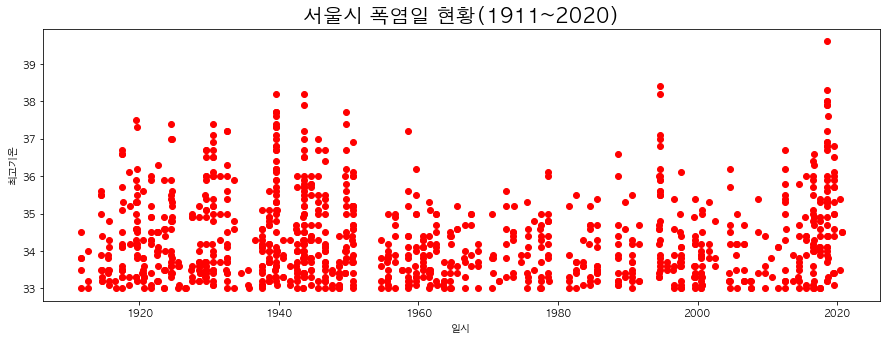

In [26]:
plt.rcParams['figure.figsize']=(15,5)
plt.plot(df_seoul_hotday['일시'], df_seoul_hotday['최고기온(°C)'],'ro')
plt.xlabel('일시')
plt.ylabel('최고기온')
plt.title('서울시 폭염일 현황(1911~2020)', size=20)

plt.show()

## 서울시 열대야 데이터 추출
- 일 최저기온 25도 이상

In [27]:
df_seoul_hotnight = df_seoul[df_seoul['최저기온(°C)']>=25]
df_seoul_hotnight

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3522,108,서울,1911-08-12,28.7,25.8,34.5
4601,108,서울,1914-07-26,29.7,25.8,35.6
4602,108,서울,1914-07-27,30.2,25.6,35.5
4605,108,서울,1914-07-30,25.7,25.1,27.4
4621,108,서울,1914-08-15,27.2,25.2,31.5
...,...,...,...,...,...,...
1295693,108,서울,2020-08-25,29.9,26.0,34.5
1295694,108,서울,2020-08-26,30.2,27.0,34.5
1295695,108,서울,2020-08-27,27.1,25.6,28.6
1295696,108,서울,2020-08-28,27.3,26.0,29.7


## 서울시 열대야 데이터 시각화

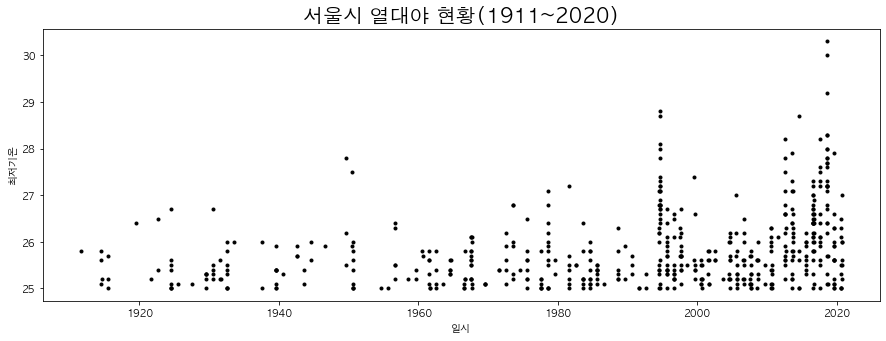

In [29]:
plt.plot(df_seoul_hotnight['일시'], df_seoul_hotnight['최저기온(°C)'], 'k.')
plt.title('서울시 열대야 현황(1911~2020)', size=20)
plt.xlabel('일시')
plt.ylabel('최저기온')
plt.show()